Proje adı: LSTM ile Havayolu Yolcusu Tahmini

Proje Açıklaması:
Bu proje, Havayolu Yolcusu veri setini kullanarak bir LSTM (Uzun Kısa Süreli Bellek) modeli oluşturmayı ve gelecek ayki yolcu sayısını tahmin etmeyi amaçlamaktadır. LSTM, zaman serisi verilerindeki karmaşık ilişkileri yakalayabilen bir derin öğrenme modelidir.

Veri Seti:
Havayolu Yolcusu veri seti, 1949'dan 1960'a kadar olan bir dönemde aylık olarak toplanan ABD havayolu yolcu sayılarını içerir. Veri setindeki her bir veri noktası, bir ayın toplam yolcu sayısını temsil eder.

Proje Adımları:

Veri Seti Keşfi: İlk adım, veri setini keşfetmek ve görselleştirmektir. Veri setinin istatistiklerini inceleyerek ve grafiğini çizerek trendleri, mevsimsel örüntüleri ve herhangi bir aykırı değeri belirleyebiliriz.

Veri Ön İşleme: LSTM modeli için veri setini hazırlamak önemlidir. Veri setini eğitim ve test veri setlerine bölebiliriz. Ayrıca, verileri ölçeklendirebiliriz, örneğin Min-Max ölçeklendirme kullanarak 0 ile 1 arasına getirebiliriz.

LSTM Modelinin Oluşturulması: Keras veya TensorFlow gibi bir derin öğrenme kütüphanesi kullanarak LSTM modelini oluşturabiliriz. Modelin katmanlarını, düğüm sayılarını ve hiperparametreleri belirlemeliyiz.

Modelin Eğitimi: Hazırlanan LSTM modelini eğitim veri setiyle eğitebiliriz. Model, eğitim veri seti üzerindeki zaman bağımlılıklarını öğrenecektir.

Modelin Değerlendirilmesi: Eğitim sonrası, modelin performansını test veri seti üzerinde değerlendirebiliriz. Gerçek ve tahmin edilen yolcu sayılarını karşılaştırarak modelin ne kadar iyi çalıştığını görebiliriz.

Gelecek Tahmini: Eğitilmiş LSTM modelini kullanarak gelecek aydaki yolcu sayısını tahmin edebiliriz. Son iki ayın yolcu sayısını giriş olarak kullanarak modelden tahmin isteyebiliriz.

Sonuçların Değerlendirilmesi: Elde ettiğimiz tahmin sonuçlarını gerçek verilerle karşılaştırarak modelin ne kadar doğru tahminler yaptığını değerlendirebiliriz. Görselleştirmeler veya hata metrikleri kullanarak tahmin performansını analiz edebiliriz.

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM  
from tensorflow.keras.models import Sequential 
from sklearn.preprocessing import MinMaxScaler

In [222]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [223]:
data.rename(columns={"#Passengers" : "passengers"}, inplace= True)
data = data["passengers"]

In [224]:
type(data)

pandas.core.series.Series

In [225]:
data = np.array(data).reshape(-1,1)
type(data)

numpy.ndarray

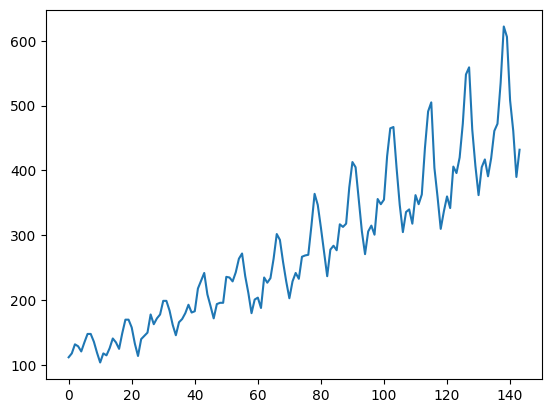

In [226]:
plt.plot(data)
plt.show()

In [227]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [228]:
len(data)

144

In [229]:
train = data[0:100,:]
train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [230]:
test = data[100:,:]
test

array([[0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.77992278],
       [0.68918919],
       [0.55212355],
       [0.63320463]])

In [231]:
import numpy as np

def get_data(data, steps):
    dataX = []
    dataY = []
    
    for i in range(len(data) - steps):
        dataX.append(data[i:i+steps])
        dataY.append(data[i+steps])
    
    return np.array(dataX), np.array(dataY)


In [232]:
steps = 2

In [233]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)
len(X_train)

98

In [234]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_train.shape

(98, 1, 2)

In [235]:
model = Sequential()
model.add(LSTM(256, input_shape = (1, steps)))  
model.add(Dense(128))    
model.add(Dense(64))
model.add(Dense(1))  
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [236]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 256)               265216    
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 308,481
Trainable params: 308,481
Non-trainable params: 0
_________________________________________________________________


In [237]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 4s 9ms/step - loss: 0.0457
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0145
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0144
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0053
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0037
Epoch 11/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0034
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 13/100
4/4 [==============================] - 0s 8ms/st

In [238]:
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 3ms/step


In [239]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

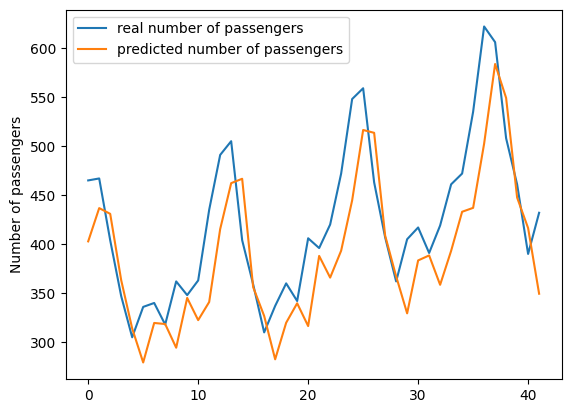

In [240]:
# plot real number of passengers and predictions...
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()